<a href="https://colab.research.google.com/github/RafaelSdeSouza/astrostats-2025/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the required libraries
!pip install numpy matplotlib scikit-learn

# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image
import urllib.request

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

## Principal components

### Imagine our data are drawn from a multivariate normal distribution (i.e., an ellipsoidal cloud of points).

### - The distribution is described by a covariance matrix $\Sigma$.
### - The eigenvectors of  $\Sigma$ point along the ellipsoid axes – these are the <u>principal components</u>.
### - The eigenvalues describe the dispersion of the data (the <u>variance</u>) along each axis.
### - We sort the principal components in order of variance.

### The plot below shows the data (blue points), the ellipsoid (green points), and the standard deviations in the principal components (red arrows)

<img src="http://star.herts.ac.uk/~kuhn/resources/mvn_pca.png" alt="Multivariate normal distribution" width="700px">


## Covariance, Eigenvalues, and Eigenvectors :

Definition: Covariance measures how two variables change together.


*   Positive Covariance: Both variables tend to increase or decrease together.

*    Negative Covariance: One variable tends to increase when the other decreases.

* Zero Covariance: Variables do not show any linear dependency.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create three synthetic datasets
X1 = np.random.randn(100)
Y1 = X1 + np.random.randn(100) * 0.5  # Positive covariance

X2 = np.random.randn(100)
Y2 = -X2 + np.random.randn(100) * 0.5  # Negative covariance

X3 = np.random.randn(100)
Y3 = np.random.randn(100)  # Zero covariance

datasets = [(X1, Y1), (X2, Y2), (X3, Y3)]

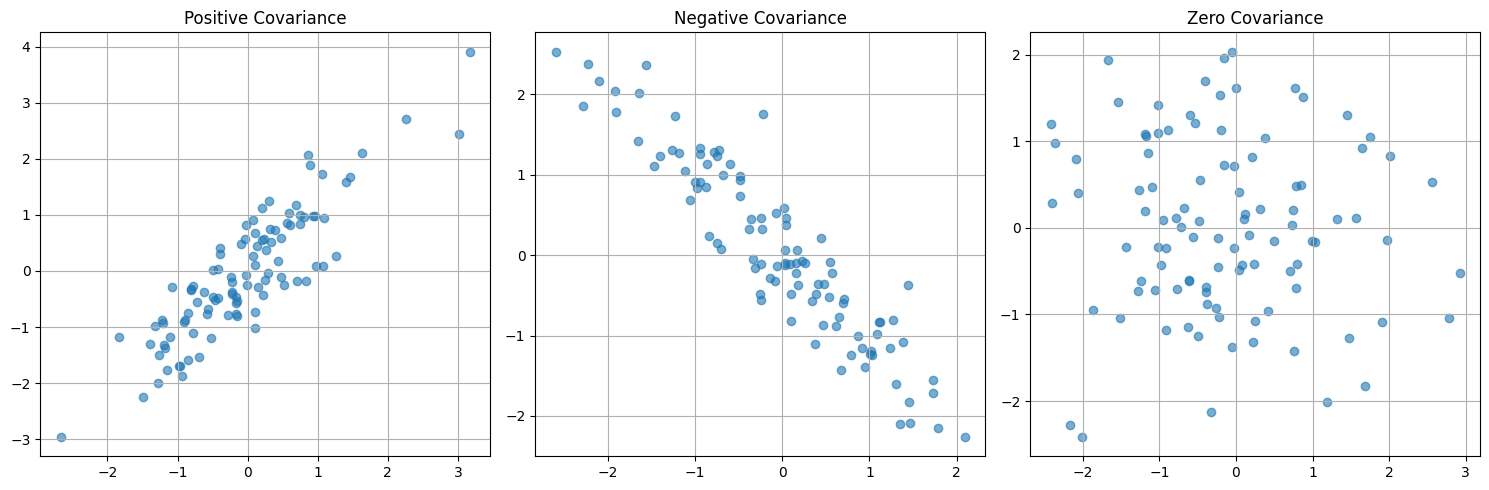

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, data, title in zip(axes, datasets, ["Positive Covariance", "Negative Covariance", "Zero Covariance"]):
    ax.scatter(data[0], data[1], alpha=0.6)
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
for i, (X, Y) in enumerate(datasets, 1):
    cov_matrix = np.cov(X, Y, bias=True)
    print(f"Covariance Matrix for Dataset {i}:\n", cov_matrix, "\n")

Covariance Matrix for Dataset 1:
 [[0.8806924  0.93128915]
 [0.93128915 1.27209529]] 

Covariance Matrix for Dataset 2:
 [[ 1.02295507 -1.05882695]
 [-1.05882695  1.26519069]] 

Covariance Matrix for Dataset 3:
 [[ 1.33600666 -0.08090651]
 [-0.08090651  1.00380202]] 



In [ ]:
for i, (X, Y) in enumerate(datasets, 1):
    cov_matrix = np.cov(X, Y, bias=True)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    print(f"Eigenvalues for Dataset {i}: {eigenvalues}")
    print(f"Eigenvectors for Dataset {i}:\n", eigenvectors, "\n")

Eigenvalues for Dataset 1: [0.12476443 2.02802326]
Eigenvectors for Dataset 1:
 [[-0.77641767 -0.63021869]
 [ 0.63021869 -0.77641767]] 

Eigenvalues for Dataset 2: [0.07834119 2.20980457]
Eigenvectors for Dataset 2:
 [[-0.74620626  0.66571482]
 [-0.66571482 -0.74620626]] 

Eigenvalues for Dataset 3: [1.35466322 0.98514546]
Eigenvectors for Dataset 3:
 [[ 0.97442858  0.22469744]
 [-0.22469744  0.97442858]] 



Which eigenvector (direction) captures the most variance in each dataset? How do you determine that from the eigenvalues?
Plot the data points and overlay the eigenvectors as arrows on the scatter plot. Can you visually validate which direction captures the most variance?

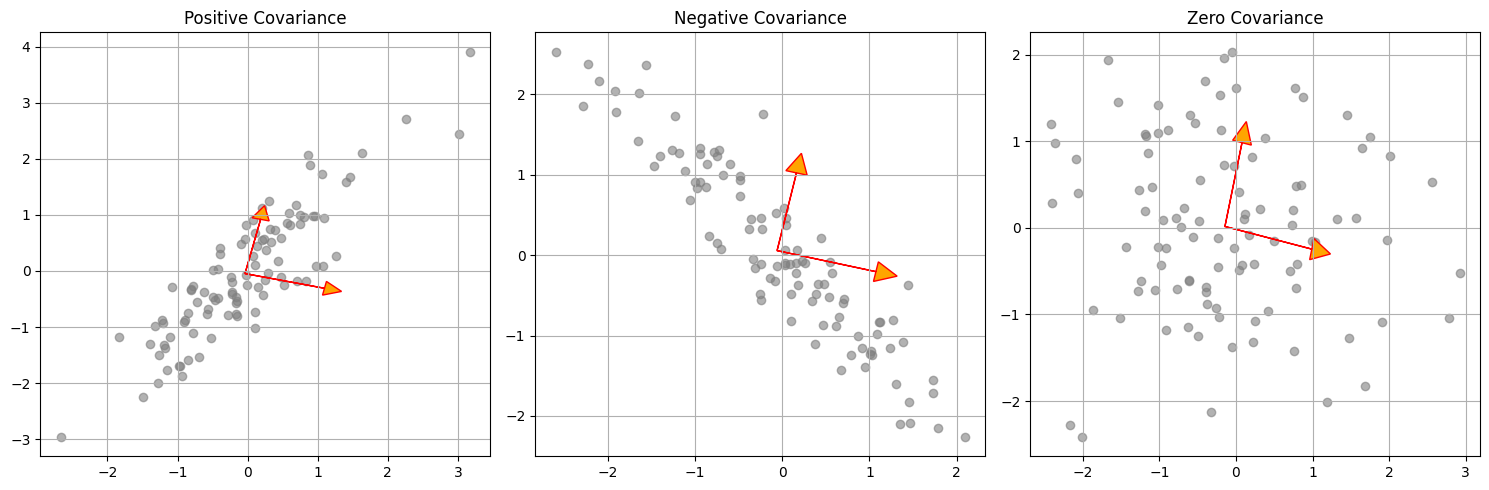

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, (x, y), title in zip(axes, datasets, ["Positive Covariance", "Negative Covariance", "Zero Covariance"]):
    # Scatter plot
    ax.scatter(x, y, alpha=0.6,c='gray')
    # Overlay eigenvectors as arrows
    scale_factor = 1  # to scale the length of the arrows for visualization
    for e_value, e_vector in zip(eigenvalues, eigenvectors.T):
        start_x, start_y = np.mean(x), np.mean(y)
        ax.arrow(start_x, start_y,
                 e_vector[0] * np.sqrt(e_value) * scale_factor,
                 e_vector[1] * np.sqrt(e_value) * scale_factor,
                 head_width=0.25, head_length=0.25, fc='orange', ec='red')

    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()

# Explanation:

*plt.subplots():* This function creates a full figure with a specific grid of

*   subplots (smaller individual plots) inside.
*   nrows=1: We want 1 row of subplots.
* ncols=3: We want 3 columns of subplots, hence three individual plots side by side.
* figsize=(15, 5): This sets the size of the entire figure to be 15 units wide and 5 units tall.
* fig: Represents the entire figure.
* axes: This is an array containing the individual plots (subplots). Since we have 3 subplots, axes will contain 3 items.


*for ax, (x, y), title in zip(axes, datasets, ["Positive Covariance", "Negative Covariance", "Zero Covariance"]):*


* We're setting up a loop to go through each of our three datasets and create a scatter plot for each one.
* zip(): This function lets us loop over three lists (axes, datasets, and the list of titles) simultaneously.
* ax: Represents the current subplot (one of the three individual plots).
(x, y): The current dataset's X and Y values.
title: The title for the current subplot.


*ax.scatter(x, y, alpha=0.6, c='gray')*


* ax.scatter(): This function creates a scatter plot on the current subplot (ax).
* x, y: These are the X and Y values for our data points.
* alpha=0.6: Makes the data points slightly transparent. 1 is fully opaque, 0 is fully transparent.
* c='gray': Sets the color of the data points to gray.


for e_value, e_vector in zip(eigenvalues, eigenvectors.T):

* This loop goes over each eigenvalue and corresponding eigenvector.
* .T: This transposes the eigenvectors matrix so that each e_vector is an array of two components.


start_x, start_y = np.mean(x), np.mean(y)
* Calculates the mean (average) of the X and Y values, respectively. We'll start our arrows from this central point.

* ax.arrow(): Draws an arrow on the subplot.
The arrow starts at (start_x, start_y).
The length and direction of the arrow are determined by the eigenvector (e_vector) and its magnitude is scaled by the square root of the eigenvalue (e_value).
* head_width and head_length: These define the size of the arrowhead.
fc='orange': The fill color of the arrowhead is orange.
ec='red': The edge color of the arrowhead is red.

# Let's see how to PCA can be use to reconstruct an image

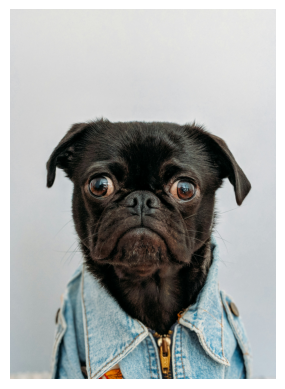

In [ ]:
# Load the image from a URL
# Here you can replace the image path to any image of your choice online
url = 'https://images.unsplash.com/photo-1518020382113-a7e8fc38eac9?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2634&q=80'
img = Image.open(urllib.request.urlopen(url))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
# Convert image to numpy array and normalize
img_np = np.array(img)/255.0

# Extract RGB channels
R = img_np[:,:,0]
G = img_np[:,:,1]
B = img_np[:,:,2]


In [ ]:
R

array([[0.87058824, 0.8627451 , 0.85882353, ..., 0.90980392, 0.90196078,
        0.90196078],
       [0.8627451 , 0.8627451 , 0.8627451 , ..., 0.90588235, 0.90588235,
        0.90588235],
       [0.85882353, 0.8627451 , 0.8627451 , ..., 0.90196078, 0.90588235,
        0.90588235],
       ...,
       [0.8       , 0.80392157, 0.80784314, ..., 0.81176471, 0.81568627,
        0.81568627],
       [0.8       , 0.8       , 0.80392157, ..., 0.81568627, 0.81176471,
        0.81176471],
       [0.8       , 0.8       , 0.80392157, ..., 0.81960784, 0.81176471,
        0.81176471]])

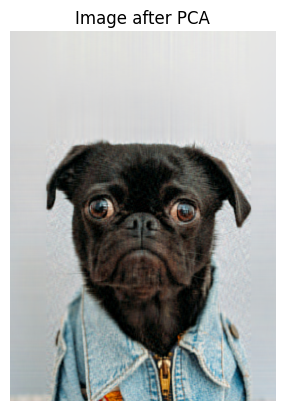

In [ ]:
# Function to apply PCA and reconstruct image
# Try to change the number of components to check how it changes the quality of the reconstruction
def pca_on_channel(channel, n_components=50):
    pca = PCA(n_components)
    transformed = pca.fit_transform(channel)
    reconstructed = pca.inverse_transform(transformed)
    return reconstructed

# Apply PCA on each channel with 2 components
R_pca = pca_on_channel(R)
G_pca = pca_on_channel(G)
B_pca = pca_on_channel(B)

# Combine reconstructed channels
img_reconstructed = np.dstack((R_pca, G_pca, B_pca))

# Display reconstructed image
plt.imshow(img_reconstructed)
plt.axis('off')
plt.title("Image after PCA")
plt.show()

### PCA  Projections




In [ ]:
!pip install astroquery scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 57.0 MB/s eta 0:00:00


In [ ]:
from astroquery.sdss import SDSS
import numpy as np
import matplotlib.pyplot as plt

def get_spectrum(plate, mjd, fiberID):
    sp = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiberID)[0]
    flux = sp[1].data['flux']
    wavelength = 10**sp[1].data['loglam']  # Converting loglam to actual wavelength
    return flux, wavelength

plates = [1349, 1349, 1349, 1349, 1349]
mjds = [52797, 52797, 52797, 52797, 52797]
fiberIDs = [161, 162, 163, 164, 165]

fluxes = []
wavelength_grids = []

# Fetch original spectra
for plate, mjd, fiberID in zip(plates, mjds, fiberIDs):
    flux, wavelength = get_spectrum(plate, mjd, fiberID)
    fluxes.append(flux)
    wavelength_grids.append(wavelength)

# Create a common wavelength grid
common_wavelength = np.linspace(min([min(w) for w in wavelength_grids]),
                                max([max(w) for w in wavelength_grids]),
                                3841)  # 3841 is a common size but can be adjusted

# Interpolate each spectrum onto the common wavelength grid
interpolated_fluxes = []
for flux, wavelength in zip(fluxes, wavelength_grids):
    interpolated_flux = np.interp(common_wavelength, wavelength, flux)
    interpolated_fluxes.append(interpolated_flux)

# Stack the interpolated spectra
spectra_matrix = np.vstack(interpolated_fluxes)

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
n_components = 5
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(spectra_matrix)

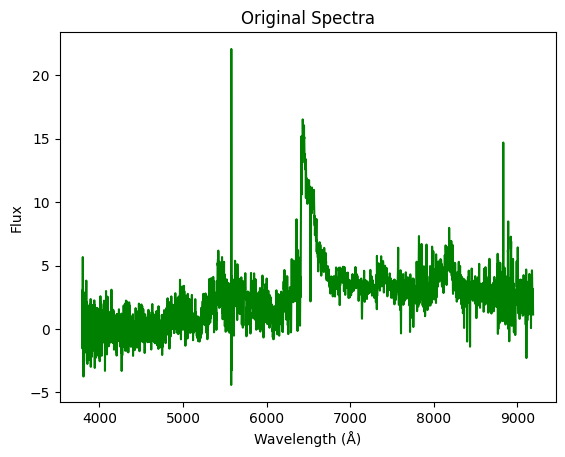

In [ ]:
# Plot first spectra
plt.plot(common_wavelength, interpolated_fluxes[0], color="green")
plt.title("Original Spectra")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux")
plt.show()


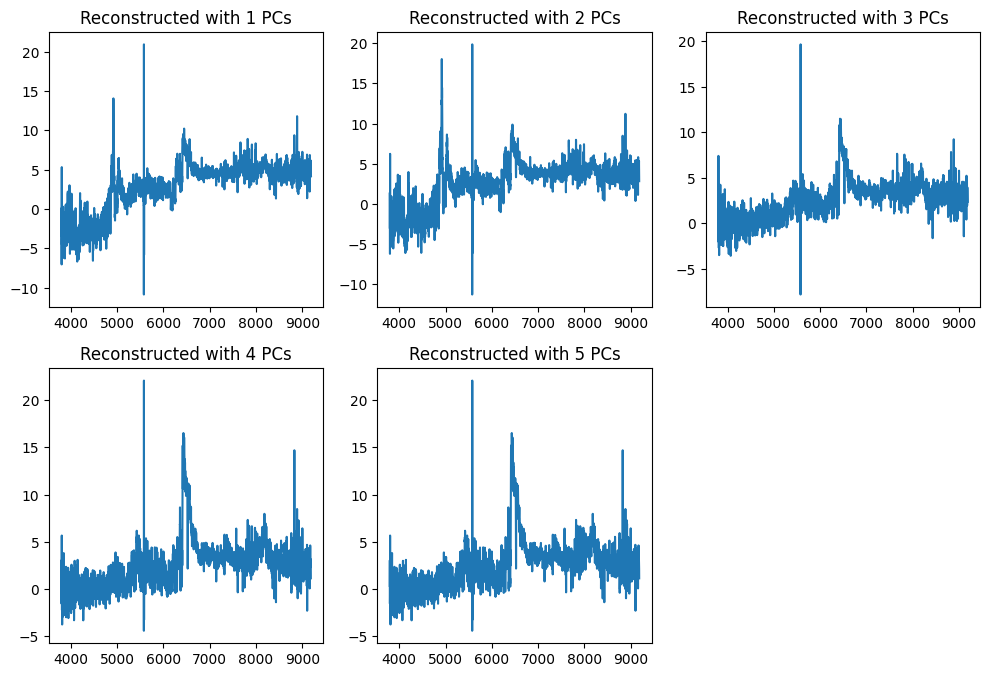

In [ ]:
# Plot original and reconstructed spectra
plt.figure(figsize=(10, 10))
for i in range(1, n_components+1):
    pca_N = PCA(n_components=i)
    transformed = pca_N.fit_transform(spectra_matrix)
    reconstructed = pca_N.inverse_transform(transformed)

    plt.subplot(3, 3, i)
    plt.plot(common_wavelength, reconstructed[0, :])  # Plotting the first spectrum as an example
    plt.title(f"Reconstructed with {i} PCs")

plt.tight_layout()
plt.show()

## Exercise:

Explore the 'star_galaxy_quasar.csv' data. Try to use all the concepts you have learned so far, as if you were conducting a scientific exploration. Project the photometric bands [u,g,r,i,z] onto principal components and color-code by class. What can you conclude?

